<a href="https://colab.research.google.com/github/KenDaupsey/Principal-Component-Analysis-Using-Python/blob/main/Principal_Component_analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Principal Component analysis ***

In [1]:
# Import necessary libraries and Load dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Principal-Component-Analysis-Using-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [3]:
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


In [5]:
# Select the variables for PCA
X_pca = df[['read', 'write', 'math', 'science', 'socst']]

# Standardize the data
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

In [6]:
# Perform PCA
pca = PCA()
pca.fit(X_pca_scaled)

PCA()

In [7]:
#Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Print explained_variance_ratio

In [8]:
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
cumulative_explained_variance

array([0.67616396, 0.78763961, 0.86899817, 0.94023173, 1.        ])

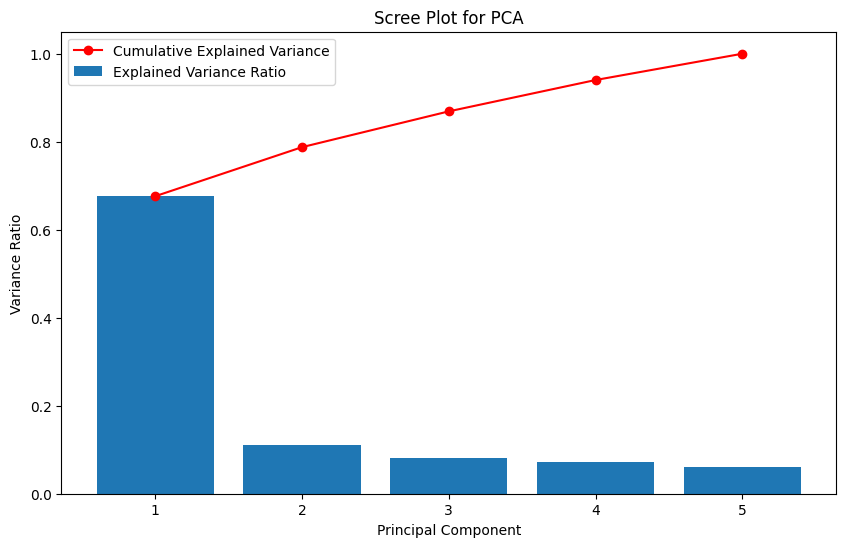

In [9]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot for PCA')
plt.legend()
plt.show()

In [10]:
# Choose the number of components based on the scree plot or explained variance threshold
num_components = 3 ### Adjust as needed

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca_result = pca.fit_transform(X_pca_scaled)

# Create a DataFrame to store the results
pca_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca_result = pd.DataFrame(data=X_pca_result, columns=pca_columns)

In [11]:
pca_columns

['PC1', 'PC2', 'PC3']

In [12]:
df_pca_result

,PC1,PC2,PC3
0,0.422167,-0.903280,0.421110
1,-1.865250,0.029087,0.504468
2,1.826208,2.264677,0.744701
3,0.008491,-0.106011,1.395494
4,-0.330894,-0.380147,0.003844
...,...,...,...
195,-0.098344,-0.997438,-0.306886
196,2.460462,-0.838666,-0.120908
197,0.004250,0.614771,1.244778
198,-1.439595,-0.241126,-0.429918


In [13]:
# Concatenate the PCA results with the original dataset
df_final = pd.concat([df, df_pca_result], axis=1)

df_final.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,PC1,PC2,PC3
0,70,male,white,low,public,general,57,52,41,47,57,0.422167,-0.903280,0.421110
1,121,female,white,middle,public,vocation,68,59,53,63,61,-1.865250,0.029087,0.504468
2,86,male,white,high,public,general,44,33,54,58,31,1.826208,2.264677,0.744701
3,141,male,white,high,public,vocation,63,44,47,53,56,0.008491,-0.106011,1.395494
4,172,male,white,middle,public,academic,47,52,57,53,61,-0.330894,-0.380147,0.003844


In [14]:
# Print the PCA components and their loadings
print("PCA Components:")
print(pca.components_)

PCA Components:
[[-4.66418418e-01 -4.48389278e-01 -4.58775506e-01 -4.35582392e-01
  -4.25668803e-01]
 [ 2.72786820e-02 -2.07547416e-01  2.60901840e-01  6.10893288e-01
  -7.17578961e-01]
 [ 5.31273673e-01 -8.06423789e-01  5.95269155e-04  6.95392373e-03
   2.59577052e-01]]


In [15]:
# Print the explained variance ratio for each component
print("Explained Variance Ratio for each Principal Component:")
print(explained_variance_ratio)

Explained Variance Ratio for each Principal Component:
[0.67616396 0.11147565 0.08135855 0.07123356 0.05976827]


In [16]:
# Print the cumulative explained variance
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

Cumulative Explained Variance:
[0.67616396 0.78763961 0.86899817 0.94023173 1.        ]


In [17]:
# Display the final dataset with PCA components
print("Final Dataset with PCA Components:")
print(df_final.head())

Final Dataset with PCA Components:
    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst       PC1       PC2       PC3  
0     57  0.422167 -0.903280  0.421110  
1     61 -1.865250  0.029087  0.504468  
2     31  1.826208  2.264677  0.744701  
3     56  0.008491 -0.106011  1.395494  
4     61 -0.330894 -0.380147  0.003844  


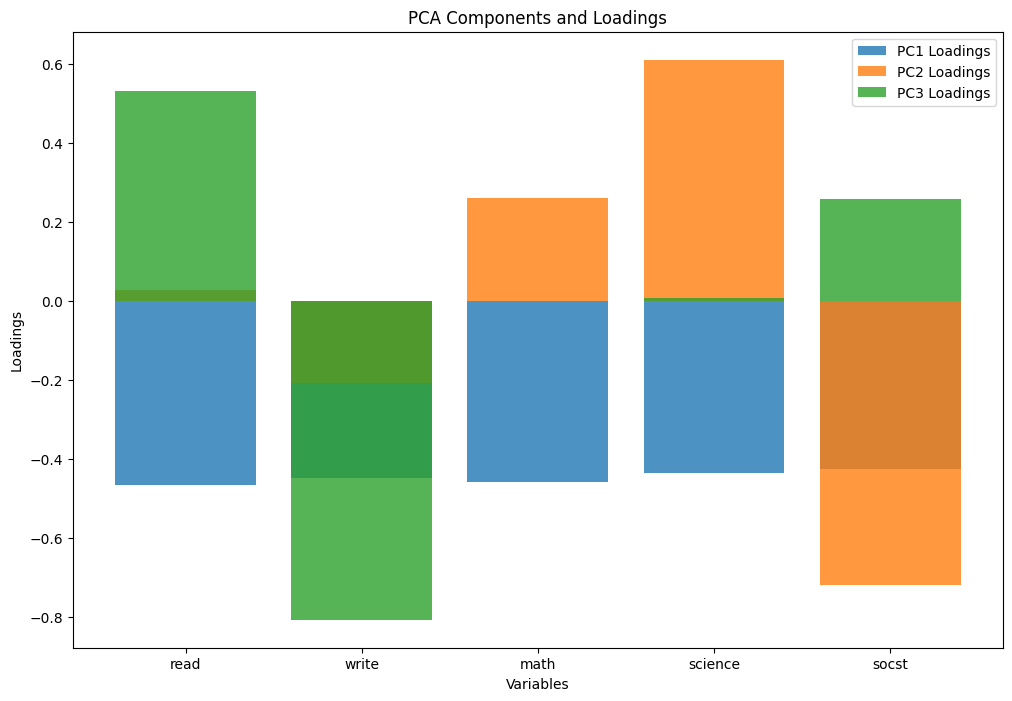

In [18]:
# Bar plot for PCA components and their loadings
plt.figure(figsize=(12, 8))

for i in range(len(pca.components_)):
    plt.bar(X_pca.columns, pca.components_[i], alpha=0.8, label=f'PC{i + 1} Loadings')

plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('PCA Components and Loadings')
plt.legend()
plt.show()

*** Principal Component Analysis ~ Entire Code ***

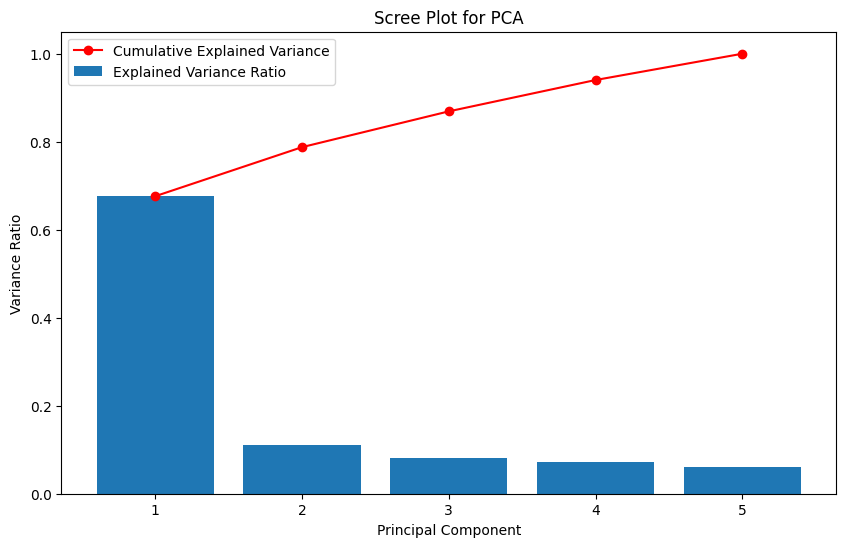

PCA Components:
[[-4.66418418e-01 -4.48389278e-01 -4.58775506e-01 -4.35582392e-01
  -4.25668803e-01]
 [ 2.72786820e-02 -2.07547416e-01  2.60901840e-01  6.10893288e-01
  -7.17578961e-01]
 [ 5.31273673e-01 -8.06423789e-01  5.95269155e-04  6.95392373e-03
   2.59577052e-01]]
Explained Variance Ratio for each Principal Component:
[0.67616396 0.11147565 0.08135855 0.07123356 0.05976827]
Cumulative Explained Variance:
[0.67616396 0.78763961 0.86899817 0.94023173 1.        ]
Final Dataset with PCA Components:
    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst       PC1

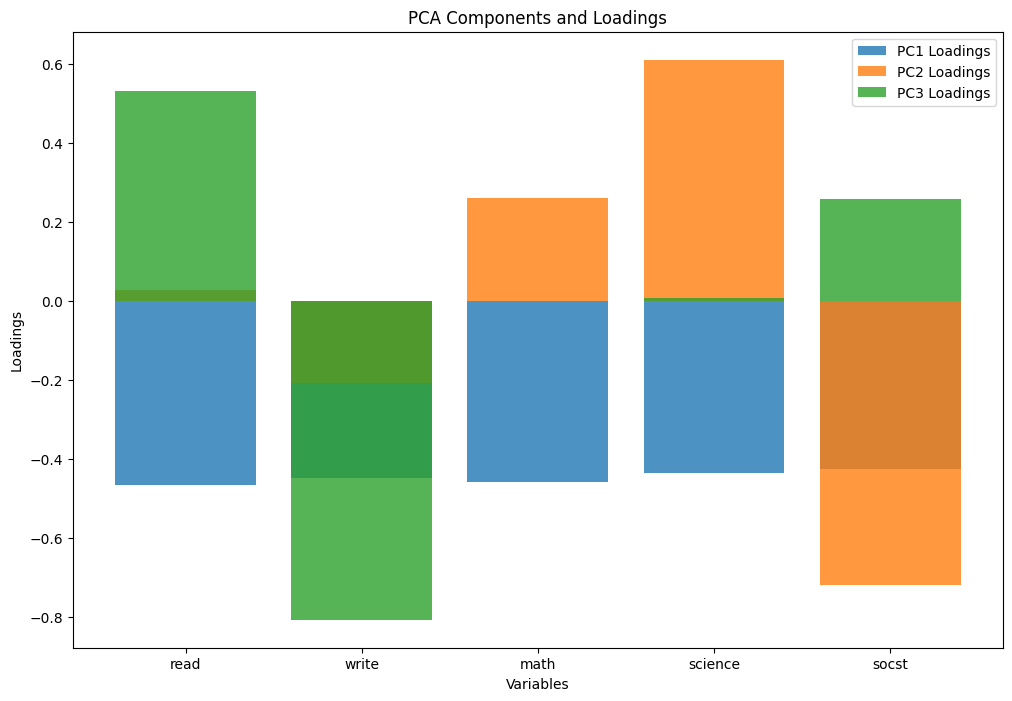

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Principal-Component-Analysis-Using-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)
df.head()

# Select the variables for PCA
X_pca = df[['read', 'write', 'math', 'science', 'socst']]

# Standardize the data
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
pca.fit(X_pca_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot for PCA')
plt.legend()
plt.show()

# Choose the number of components based on the scree plot or explained variance threshold
num_components = 3 ### Adjust as needed

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca_result = pca.fit_transform(X_pca_scaled)

# Create a DataFrame to store the results
pca_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca_result = pd.DataFrame(data=X_pca_result, columns=pca_columns)

# Concatenate the PCA results with the original dataset
df_final = pd.concat([df, df_pca_result], axis=1)

# Print the PCA components and their loadings
print("PCA Components:")
print(pca.components_)

# Print the explained variance ratio for each component
print("Explained Variance Ratio for each Principal Component:")
print(explained_variance_ratio)

# Print the cumulative explained variance
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

# Display the final dataset with PCA components
print("Final Dataset with PCA Components:")
print(df_final.head())


# Bar plot for PCA components and their loadings
plt.figure(figsize=(12, 8))

for i in range(len(pca.components_)):
    plt.bar(X_pca.columns, pca.components_[i], alpha=0.8, label=f'PC{i + 1} Loadings')

plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('PCA Components and Loadings')
plt.legend()
plt.show()

*** The End ***